# Convolutional Neural Network Architecture
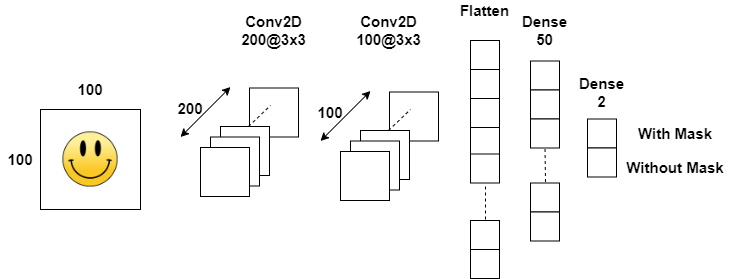

In [3]:
import numpy as np

data=np.load('data-klasifikasiDB.npy')
target=np.load('target-klasifikasiDB.npy')

#loading the save numpy arrays in the previous code

#data dan target digunakan untuk dataset yg DB_n-a
#ada 9 kategori

#dataDB2 dan targetDB2 hasil dari dataset yang di /DB-FIX/P12/normal
#ada 10kategori dgn unknown (lihat bawah)

In [4]:
data.shape[1:]

(150, 150, 1)

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(512,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
#templatenya: tf.keras.layers.MaxPooling2D( pool_size=(2, 2), strides=None, padding="valid", data_format=None) 
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(128,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(10,activation='softmax'))
#The Final layer with two outputs for 10 categories
# kalo yg data dan target dia 9 kategori --> dense 9
# kalo yg dataDB2 dan targetDB2 dia 10 kategori --> dense 10
# kalo yg dataROI dan targetROI dia 5 kategori --> dense 5

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.


In [6]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
checkpoint = ModelCheckpoint('model_klasifikasiDB-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.2)

Train on 6580 samples, validate on 1646 samples
Epoch 1/10
6580/6580 [==============================] - 1113s 169ms/step - loss: 0.2364 - accuracy: 0.9309 - val_loss: 0.1322 - val_accuracy: 0.9642
Epoch 2/10
6580/6580 [==============================] - 1242s 189ms/step - loss: 0.1319 - accuracy: 0.9603 - val_loss: 0.0741 - val_accuracy: 0.9787
Epoch 3/10
6580/6580 [==============================] - 1267s 193ms/step - loss: 0.0958 - accuracy: 0.9708 - val_loss: 0.0728 - val_accuracy: 0.9787
Epoch 4/10
6580/6580 [==============================] - 1408s 214ms/step - loss: 0.0823 - accuracy: 0.9760 - val_loss: 0.0480 - val_accuracy: 0.9860
Epoch 5/10
6580/6580 [==============================] - 1324s 201ms/step - loss: 0.0609 - accuracy: 0.9815 - val_loss: 0.0663 - val_accuracy: 0.9806
Epoch 6/10
6580/6580 [==============================] - 1287s 196ms/step - loss: 0.0538 - accuracy: 0.9834 - val_loss: 0.0704 - val_accuracy: 0.9824
Epoch 7/10
6580/6580 [==============================] - 12

In [9]:
# untuk melihat ringkasan model yg dibuat. 
# tau brp jmlh parameter yg digunakan

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 512)     5120      
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 512)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 512)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 256)       1179904   
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)            

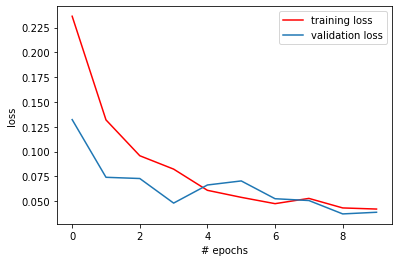

In [10]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

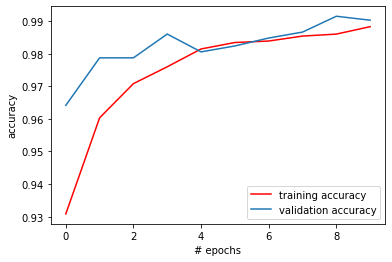

In [11]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [12]:
print(model.evaluate(test_data,test_target))

915/915 [==============================] - 33s 36ms/step
[0.03548254416135898, 0.9879781603813171]


# Confusion Matrix 1

(src: https://towardsdatascience.com/multi-class-classification-extracting-performance-metrics-from-the-confusion-matrix-b379b427a872)

In [13]:
#confusion matrix dengan model yg dibuat (src: https://towardsdatascience.com/multi-class-classification-extracting-performance-metrics-from-the-confusion-matrix-b379b427a872)

y_pred = model.predict(test_data)
y_pred = np.argmax(y_pred, axis=1)
test_target = np.argmax(test_target, axis=1)

In [14]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(test_target, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 81   0   0   0   0   0   0   0   0   0]
 [  0  83   0   0   0   0   0   0   0   0]
 [  0   0  71   1   4   0   0   0   0   0]
 [  0   0   0  82   3   0   0   0   0   0]
 [  0   0   1   0 264   0   0   0   0   0]
 [  0   0   0   0   0  69   0   0   0   0]
 [  0   0   0   0   0   0  60   0   0   0]
 [  0   0   1   0   0   0   0  56   1   0]
 [  0   0   0   0   0   0   0   0  52   0]
 [  0   0   0   0   0   0   0   0   0  86]]


class_names = ['alis kerung', 'alis naik', 'lirik kanan', 'lirik kiri', 'normal', 'ngadep atas', 'ngadep bawah', 'ngadep kanan', 'ngadep kiri', 'unknown']

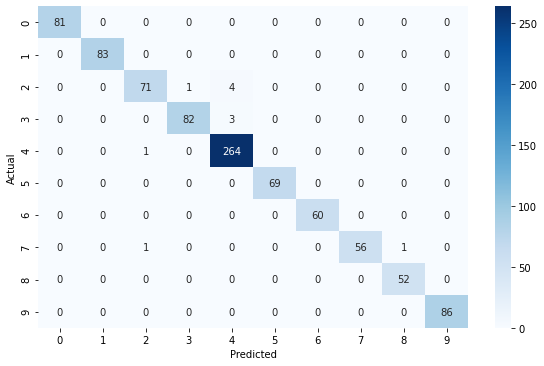

In [15]:
#ini berhasil buat nampilin lebih menarik

import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion, annot=True, fmt=".0f", ax=ax, cmap=plt.cm.Blues)
plt.tight_layout()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
FP = confusion.sum(axis=0) - np.diag(confusion) 
FN = confusion.sum(axis=1) - np.diag(confusion)
TP = np.diag(confusion)
TN = confusion.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [17]:
print ("TPR = ", TPR)
print ("TNR = ", TNR)
print ("PPV = ", PPV)
print ("NPV = ", NPV)
print ("FPR = ", FPR)
print ("FNR = ", FNR)
print ("FDR = ", FDR)
print ("ACC = ", ACC)

#ini tuh nilai untuk setiap output 0 1 2 3 4 dst (kepinggir)

TPR =  [1.         1.         0.93421053 0.96470588 0.99622642 1.
 1.         0.96551724 1.         1.        ]
TNR =  [1.         1.         0.99761621 0.99879518 0.98923077 1.
 1.         1.         0.99884125 1.        ]
PPV =  [1.         1.         0.97260274 0.98795181 0.97416974 1.
 1.         1.         0.98113208 1.        ]
NPV =  [1.         1.         0.99406176 0.99639423 0.9984472  1.
 1.         0.99767171 1.         1.        ]
FPR =  [0.         0.         0.00238379 0.00120482 0.01076923 0.
 0.         0.         0.00115875 0.        ]
FNR =  [0.         0.         0.06578947 0.03529412 0.00377358 0.
 0.         0.03448276 0.         0.        ]
FDR =  [0.         0.         0.02739726 0.01204819 0.02583026 0.
 0.         0.         0.01886792 0.        ]
ACC =  [1.         1.         0.99234973 0.99562842 0.99125683 1.
 1.         0.99781421 0.9989071  1.        ]


In [18]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(test_target, y_pred))

#kalo mau dikasih nama di class. report nya tambahin ini "target_names = ['Rugby (Class 0)','Soccer (Class 1)']" --> sesuain aja


Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        83
           2       0.97      0.93      0.95        76
           3       0.99      0.96      0.98        85
           4       0.97      1.00      0.99       265
           5       1.00      1.00      1.00        69
           6       1.00      1.00      1.00        60
           7       1.00      0.97      0.98        58
           8       0.98      1.00      0.99        52
           9       1.00      1.00      1.00        86

    accuracy                           0.99       915
   macro avg       0.99      0.99      0.99       915
weighted avg       0.99      0.99      0.99       915

